In [ ]:
!pip install opencv-python


In [ ]:
import cv2


In [10]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import os

os.listdir('/content/drive/MyDrive')


['Colab Notebooks', 'archive']

In [ ]:
img = cv2.imread(r"C:\Users\sarth\Downloads\archive\training_set\training_set\dogs\dog.945.jpg")


In [ ]:
print(type(img))
print(img.shape)


<class 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
import os

os.listdir('/content/drive/MyDrive/archive')


['test_set', 'training_set']

In [ ]:
os.listdir('/content/drive/MyDrive/archive/training_set')


['training_set']

In [ ]:
os.listdir('/content/drive/MyDrive/archive/training_set/training_set/dogs')[:5]


['dog.3710.jpg',
 'dog.3638.jpg',
 'dog.3671.jpg',
 'dog.3656.jpg',
 'dog.3751.jpg']

In [12]:
import cv2

img = cv2.imread(
    "/content/drive/MyDrive/archive/training_set/training_set/dogs/dog.945.jpg"
)


In [ ]:
print(type(img))
print(img.shape)


<class 'numpy.ndarray'>
(374, 500, 3)


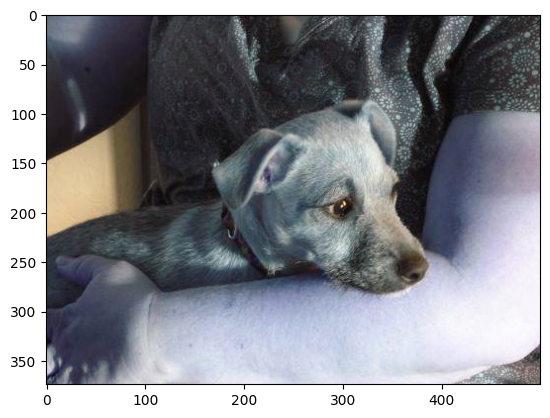

In [13]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()


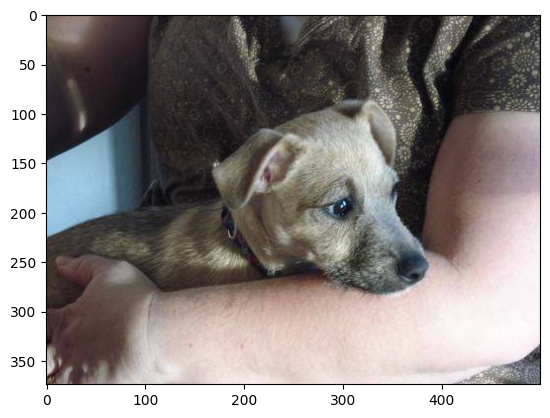

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()


In [ ]:
img_resized = cv2.resize(img_rgb, (128, 128))


In [ ]:
print(img_resized.shape)


(128, 128, 3)


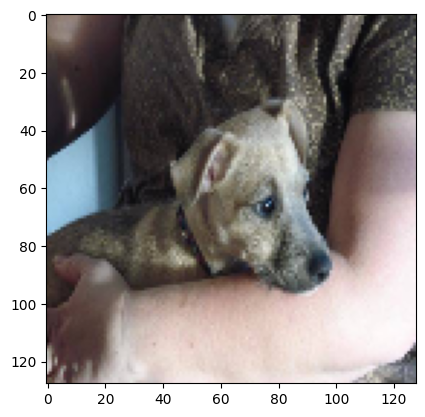

In [ ]:
plt.imshow(img_resized)
plt.show()


In [ ]:
img_normalized = img_resized / 255.0


In [15]:
cats_path = "/content/drive/MyDrive/archive/training_set/training_set/cats/"


In [16]:
import os

files = os.listdir(cats_path)
print(files[:5])


['cat.3733.jpg', 'cat.3728.jpg', 'cat.3632.jpg', 'cat.3736.jpg', 'cat.3664.jpg']


In [17]:
import os

os.listdir('/content/drive/MyDrive/archive')


['test_set', 'training_set']

In [7]:
import os

os.listdir('/content/drive/MyDrive')


['Colab Notebooks', 'archive']

In [8]:
os.listdir('/content/drive/MyDrive/archive')


['test_set', 'training_set']

In [9]:
os.listdir('/content/drive/MyDrive/archive/training_set')


['training_set']

In [18]:
os.listdir('/content/drive/MyDrive/archive/training_set/training_set')


['cats', 'dogs']

In [12]:
import os

cats_path = "/content/drive/MyDrive/archive/training_set/training_set/cats/"

print(os.listdir(cats_path)[:5])



['cat.3733.jpg', 'cat.3728.jpg', 'cat.3632.jpg', 'cat.3736.jpg', 'cat.3664.jpg']


In [19]:
import os
import cv2
import numpy as np

# Path to cats folder
cats_path = "/content/drive/MyDrive/archive/training_set/training_set/cats/"

# Storage lists
X = []
y = []

# Loop through all cat images
for file in os.listdir(cats_path):

    # Build full image path
    img_path = os.path.join(cats_path, file)

    # Load image
    img = cv2.imread(img_path)

    # Skip if image not loaded
    if img is None:
        continue

    # Convert BGR → RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image
    img = cv2.resize(img, (128, 128))

    # Normalize pixels
    img = img / 255.0

    # Store image & label
    X.append(img)
    y.append(0)   # Label 0 = Cat


In [15]:
print(len(X))
print(len(y))


4000
4000


In [20]:
# Path to dogs folder
dogs_path = "/content/drive/MyDrive/archive/training_set/training_set/dogs/"

for file in os.listdir(dogs_path):

    img_path = os.path.join(dogs_path, file)

    img = cv2.imread(img_path)

    if img is None:
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = cv2.resize(img, (128, 128))

    img = img / 255.0

    X.append(img)
    y.append(1)   # Label 1 = Dog


In [18]:
print(len(X))
print(len(y))


10169
10169


In [21]:
X = np.array(X)
y = np.array(y)


In [20]:
print(X.shape)
print(y.shape)


(10169, 128, 128, 3)
(10169,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)



In [23]:
print(X_train.shape)
print(X_test.shape)


(8135, 128, 128, 3)
(2034, 128, 128, 3)


In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [29]:
model = keras.Sequential()

# Conv Block 1
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(2,2))

# Conv Block 2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

# Flatten
model.add(layers.Flatten())

# Dense
model.add(layers.Dense(128, activation='relu'))

# ⭐ Dropout Added Here
model.add(layers.Dropout(0.5))

# Output
model.add(layers.Dense(1, activation='sigmoid'))



In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [26]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test),
    batch_size=32
)

Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 169s 835ms/step - accuracy: 0.5587 - loss: 0.7505 - val_accuracy: 0.6276 - val_loss: 0.6460
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 190s 775ms/step - accuracy: 0.6903 - loss: 0.6038 - val_accuracy: 0.7093 - val_loss: 0.5898
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 210s 819ms/step - accuracy: 0.7615 - loss: 0.5072 - val_accuracy: 0.6981 - val_loss: 0.5844
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 202s 815ms/step - accuracy: 0.8273 - loss: 0.3879 - val_accuracy: 0.7342 - val_loss: 0.5990
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 206s 840ms/step - accuracy: 0.8885 - loss: 0.2690 - val_accuracy: 0.7505 - val_loss: 0.6113


In [32]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_acc)


51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.7419 - loss: 0.6495
Test Accuracy: 0.7504678964614868


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator()


In [35]:
train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=32
)


In [36]:
test_generator = test_datagen.flow(
    X_test,
    y_test,
    batch_size=32
)


In [37]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 188s 932ms/step - accuracy: 0.6961 - loss: 0.5880 - val_accuracy: 0.7717 - val_loss: 0.4968
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 182s 904ms/step - accuracy: 0.7237 - loss: 0.5448 - val_accuracy: 0.7661 - val_loss: 0.4968
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 176s 877ms/step - accuracy: 0.7396 - loss: 0.5200 - val_accuracy: 0.7642 - val_loss: 0.4807
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 175s 871ms/step - accuracy: 0.7437 - loss: 0.5209 - val_accuracy: 0.7548 - val_loss: 0.5270
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 176s 874ms/step - accuracy: 0.7629 - loss: 0.4867 - val_accuracy: 0.7904 - val_loss: 0.4524


In [38]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


In [39]:
base_model = MobileNetV2(
    weights='imagenet',      # pretrained weights
    include_top=False,       # remove original classifier
    input_shape=(128,128,3)
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [40]:
for layer in base_model.layers:
    layer.trainable = False


In [41]:
model = models.Sequential()

model.add(base_model)

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))


In [42]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [43]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator
)


Epoch 1/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 125s 590ms/step - accuracy: 0.8857 - loss: 0.5361 - val_accuracy: 0.9563 - val_loss: 0.1070
Epoch 2/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 578ms/step - accuracy: 0.9348 - loss: 0.1613 - val_accuracy: 0.9651 - val_loss: 0.0965
Epoch 3/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 577ms/step - accuracy: 0.9420 - loss: 0.1480 - val_accuracy: 0.9520 - val_loss: 0.1630
Epoch 4/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 116s 575ms/step - accuracy: 0.9377 - loss: 0.1629 - val_accuracy: 0.9626 - val_loss: 0.1070
Epoch 5/5
201/201 ━━━━━━━━━━━━━━━━━━━━ 118s 588ms/step - accuracy: 0.9535 - loss: 0.1246 - val_accuracy: 0.9638 - val_loss: 0.0892
